In [1160]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [1161]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Optimization

In [1162]:
A=pd.Series([0,-1,1,-1,1],name='WarmUpTime')
B=pd.Series([0,-1,-1,1,1], name='WaterIntake')
y=pd.Series([275,301,280,270,255],name='TimeKm')

In [1163]:
DF=pd.concat([A,B,y],axis='columns')
print(DF)

   WarmUpTime  WaterIntake  TimeKm
0           0            0     275
1          -1           -1     301
2           1           -1     280
3          -1            1     270
4           1            1     255


In [1164]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_A=ols('y~A*B',data=DF)
results_A=model_A.fit()
print(results_A.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.994  
Dependent Variable: y                AIC:                17.0811
Date:               2022-04-05 16:32 BIC:                15.5189
No. Observations:   5                Log-Likelihood:     -4.5406
Df Model:           3                F-statistic:        206.9  
Df Residuals:       1                Prob (F-statistic): 0.0511 
R-squared:          0.998            Scale:              1.8000 
----------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------
Intercept    276.2000   0.6000 460.3333 0.0014 268.5763 283.8237
A             -9.0000   0.6708 -13.4164 0.0474 -17.5236  -0.4764
B            -14.0000   0.6708 -20.8700 0.0305 -22.5236  -5.4764
A:B            1.5000   0.6708   2.2361 0.2677  -7.0236  10.0236
------------------------------------------

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



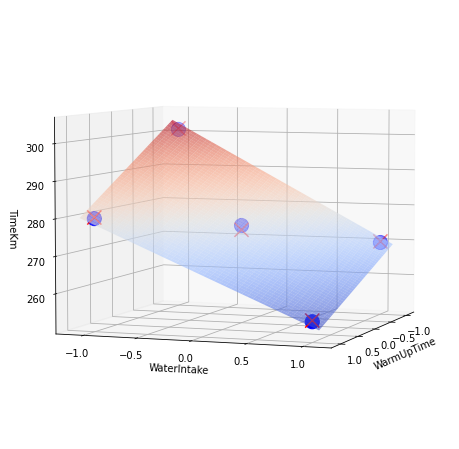

In [1165]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DF
x = df['WarmUpTime']
y= df['WaterIntake']
z = df['TimeKm']

x1,x2,x3=model_A.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_A.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=20)

ax.set_xlabel("WarmUpTime")
ax.set_ylabel("WaterIntake")
ax.set_zlabel("TimeKm")
             
ax.scatter(x.values,y.values,results_A.fittedvalues.values,s=200,color='blue',label="Fited Values")

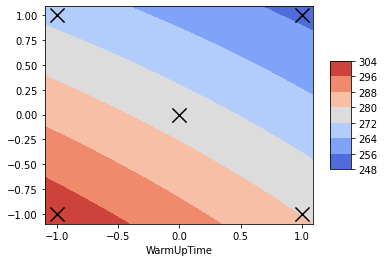

In [1166]:
fig, ax = plt.subplots(1, 1)

contour_A=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_A,shrink=0.5,aspect=5)
plt.xlabel("WarmUpTime")
plt.ylabel("")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

In [1178]:
A=pd.Series([0,-1,1,-1,1,2],name='WarmUpTime')
B=pd.Series([0,-1,-1,1,1,3], name='WaterIntake')
y=pd.Series([275,301,280,270,255,232],name='TimeKm')

In [1179]:
DFB=pd.concat([A,B,y],axis='columns')
print(DFB)

   WarmUpTime  WaterIntake  TimeKm
0           0            0     275
1          -1           -1     301
2           1           -1     280
3          -1            1     270
4           1            1     255
5           2            3     232


In [1180]:
model_B=ols('y~A*B',data=DFB)
results_B=model_B.fit()
print(results_B.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.995  
Dependent Variable: y                AIC:                24.2123
Date:               2022-04-05 16:34 BIC:                23.3793
No. Observations:   6                Log-Likelihood:     -8.1061
Df Model:           3                F-statistic:        348.9  
Df Residuals:       2                Prob (F-statistic): 0.00286
R-squared:          0.998            Scale:              2.6190 
----------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------
Intercept    276.3011   0.7183 384.6418 0.0000 273.2104 279.3919
A             -8.7472   0.7785 -11.2360 0.0078 -12.0968  -5.3976
B            -13.6208   0.7384 -18.4468 0.0029 -16.7978 -10.4438
A:B            2.2584   0.4654   4.8522 0.0399   0.2558   4.2609
------------------------------------------

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



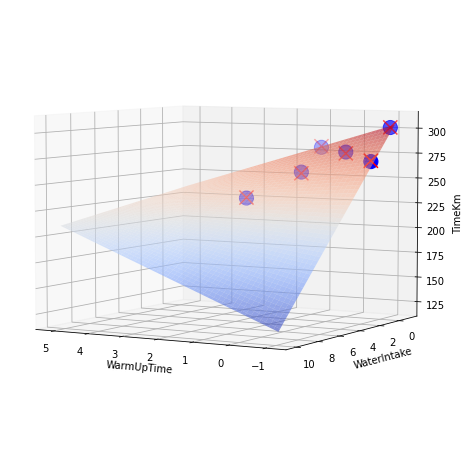

In [1190]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFB
x = df['WarmUpTime']
y= df['WaterIntake']
z = df['TimeKm']

x1,x2,x3=model_B.exog_names[1:]

x_surf=np.arange(-1.1,5.1,0.01)
y_surf=np.arange(-1.1,10.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_B.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=120)

ax.set_xlabel("WarmUpTime")
ax.set_ylabel("WaterIntake")
ax.set_zlabel("TimeKm")
             
ax.scatter(x.values,y.values,results_B.fittedvalues.values,s=200,color='blue',label="Fited Values")

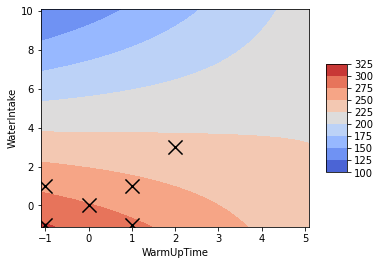

In [1191]:
fig, ax = plt.subplots(1, 1)

contour_B=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_B,shrink=0.5,aspect=5)
plt.xlabel("WarmUpTime")
plt.ylabel("WaterIntake")
ax.scatter(x,y,marker='x',color='black',s=200,label="Raw Data")

In [1192]:
DFB

,WarmUpTime,WaterIntake,TimeKm
0,0,0,275
1,-1,-1,301
2,1,-1,280
3,-1,1,270
4,1,1,255
5,2,3,232


In [1187]:
model_C=ols('TimeKm~WarmUpTime*WaterIntake+I(WarmUpTime**2)+I(WaterIntake**2)',data=DFB)
results_C=model_C.fit()
print(results_C.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     nan      
Dependent Variable:   TimeKm           AIC:                -315.3432
Date:                 2022-04-05 16:37 BIC:                -316.5927
No. Observations:     6                Log-Likelihood:     163.67   
Df Model:             5                F-statistic:        nan      
Df Residuals:         0                Prob (F-statistic): nan      
R-squared:            1.000            Scale:              inf      
--------------------------------------------------------------------
                        Coef.   Std.Err.    t    P>|t| [0.025 0.975]
--------------------------------------------------------------------
Intercept              275.0000      inf  0.0000   nan    nan    nan
WarmUpTime              -9.0000      inf -0.0000   nan    nan    nan
WaterIntake            -14.0000      inf -0.0000   nan    nan    nan
WarmUpTime:WaterIntake   1.5000      inf  0.0000   na

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\nabil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning:

invalid value encountered in double_scalars

